In [1]:
import torch
from torchvision import transforms, datasets
import numpy as np
torch.set_grad_enabled(False)
from torch import nn
# device_ids = [0, 1, 2, 3]
device_ids = [0, ]
torch.cuda.set_device(device_ids[0])
torch.multiprocessing.set_sharing_strategy('file_system')
%load_ext autoreload
%autoreload 2

/home/nguyen/miniconda3/envs/ProNos/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
import pickle

Model_name = 'byol_63'
pickle_file_path = f'/home/nguyen/NTT/OCR/ProPos/Cluster_folder/ProNos_resnet50/{Model_name}/feature_{Model_name}.pkl'
# Open and read the Pickle file
with open(pickle_file_path, 'rb') as file:  # Use 'rb' for reading in binary mode
    mem_features = pickle.load(file)

# Now, loaded_data contains the deserialized object from the Pickle file

# You can use the loaded data as needed
print(mem_features)

tensor([[-0.0458, -0.0004,  0.0040,  ..., -0.0071, -0.0155,  0.0222],
        [-0.0292, -0.0076, -0.0041,  ...,  0.0116, -0.0120,  0.0160],
        [-0.0427, -0.0001,  0.0021,  ...,  0.0060, -0.0195,  0.0211],
        ...,
        [-0.0227, -0.0152, -0.0037,  ...,  0.0095, -0.0128,  0.0090],
        [-0.0568, -0.0085, -0.0036,  ...,  0.0148, -0.0137,  0.0286],
        [-0.0260, -0.0209, -0.0065,  ...,  0.0051, -0.0121,  0.0057]],
       device='cuda:0')


In [4]:
import json
json_file_path = f'/home/nguyen/NTT/OCR/ProPos/Cluster_folder/ProNos_resnet50/{Model_name}/file_name_{Model_name}.json'
with open(json_file_path, 'r') as json_file:
    local_name = json.load(json_file)

In [13]:
print(mem_features)

tensor([[ 0.3089, -0.0331, -0.4204,  ...,  0.1571, -0.0130, -0.0036],
        [ 0.2990, -0.0189, -0.3108,  ...,  0.1484,  0.0311,  0.0486],
        [ 0.4003,  0.2105, -0.2983,  ...,  0.2793,  0.1997, -0.0073],
        ...,
        [ 0.3683,  0.3011, -0.4884,  ...,  0.0526,  0.2450,  0.1484],
        [ 0.6350,  0.5074, -0.2380,  ...,  0.2447,  0.3364,  0.4903],
        [ 0.4962,  0.1443, -0.3488,  ...,  0.0221,  0.2304,  0.2218]],
       device='cuda:0')


In [5]:
# print(local_name)
print(len(local_name))

136000


In [6]:
kwargs = {
    'metric': 'cosine',
    'distributed': True,
    'random_state': 0,
    'n_clusters': 100,
    'verbose': True
}
from torch_clustering import PyTorchKMeans, evaluate_clustering
clustering_model = PyTorchKMeans(init='k-means++', max_iter=1000, tol=1e-4, n_init=70 ,**kwargs)

psedo_labels = clustering_model.fit_predict(mem_features)



cluster_centers = clustering_model.cluster_centers_
# print(cluster_centers)

nredo 1/70, iteration 275 with inertia 6361.41:  28%|██▊       | 276/1000 [00:12<00:33, 21.66it/s]


Converged at iteration 275: strict convergence.


nredo 2/70, iteration 310 with inertia 6352.69:  31%|███       | 311/1000 [00:14<00:31, 21.65it/s]


Converged at iteration 310: strict convergence.


nredo 3/70, iteration 161 with inertia 6364.42:  16%|█▌        | 162/1000 [00:07<00:38, 21.51it/s]


Converged at iteration 161: center shift -4.76837158203125e-07 within tolerance 6.791541551365299e-08 and min inertia 6352.6875.


KeyboardInterrupt: 

In [42]:
print(psedo_labels)

tensor([1, 1, 3, 5, 3, 3, 4, 1, 5, 3, 3, 3, 0, 2, 5, 4, 0, 4, 4, 2, 1, 5, 5, 5,
        3, 3, 3, 1, 4, 4, 5, 0, 3, 0, 5, 2, 1, 4, 1, 0, 3, 5, 1, 1, 5, 3, 1, 0,
        4, 3, 0, 4, 2, 4, 5, 0, 4, 4, 4, 2, 1, 5, 5, 1, 0, 5, 3, 3, 5, 1, 3, 2,
        4, 2, 4, 1, 0, 4, 4, 4, 5, 5, 1, 1, 3, 1, 3, 1, 3, 5, 3, 2, 0, 0, 0, 4,
        0, 0, 4, 3, 5, 4, 5, 3, 0, 1, 1, 1, 0, 5, 3, 0, 4, 2, 5, 3, 5, 0, 4, 0],
       device='cuda:0')


In [7]:
psedo_labels_list = psedo_labels.tolist()

In [8]:
cluster_folder = {}
for i in range(len(psedo_labels_list)):
    class_name = str(psedo_labels_list[i])
    if class_name not in cluster_folder:
        cluster_folder[class_name] = []
        cluster_folder[class_name].append(local_name[i])
    else:
        cluster_folder[class_name].append(local_name[i])

In [9]:
file_name = 'clust_folder_byol_63_50.json'

# Save the dictionary to a JSON file
with open(file_name, 'w') as json_file:
    json.dump(cluster_folder, json_file)

'/home/nguyen/NTT/OCR/ProPos'

In [2]:
import json
# test with byol23-20
with open('/home/nguyen/NTT/OCR/ProPos/Cluster_folder/ProNos_resnet50/byol_23/clust_folder_byol_23_30.json', 'r') as json_file:
    clust_folder = json.load(json_file)

cluster_folder = dict(sorted(clust_folder.items(), key=lambda item: int(item[0])))

In [4]:
import shutil
import os 

paths = '/home/nguyen/NTT/OCR/ProPos/Clusted/'
path_to_all_data = '/home/nguyen/NTT/OCR/ProPos/DATA/ocr_dataset/new_train/'
for i in cluster_folder:
    #make folder
    class_folder = paths + i 
    os.mkdir(class_folder)
    
    for file_image_name in cluster_folder[i]:
        shutil.copy(path_to_all_data + file_image_name, class_folder)
    

In [47]:
print(len(cluster_centers))

6


In [20]:
results = evaluate_clustering(mem_labels.cpu().numpy(), psedo_labels.cpu().numpy(), eval_metric=['nmi'])

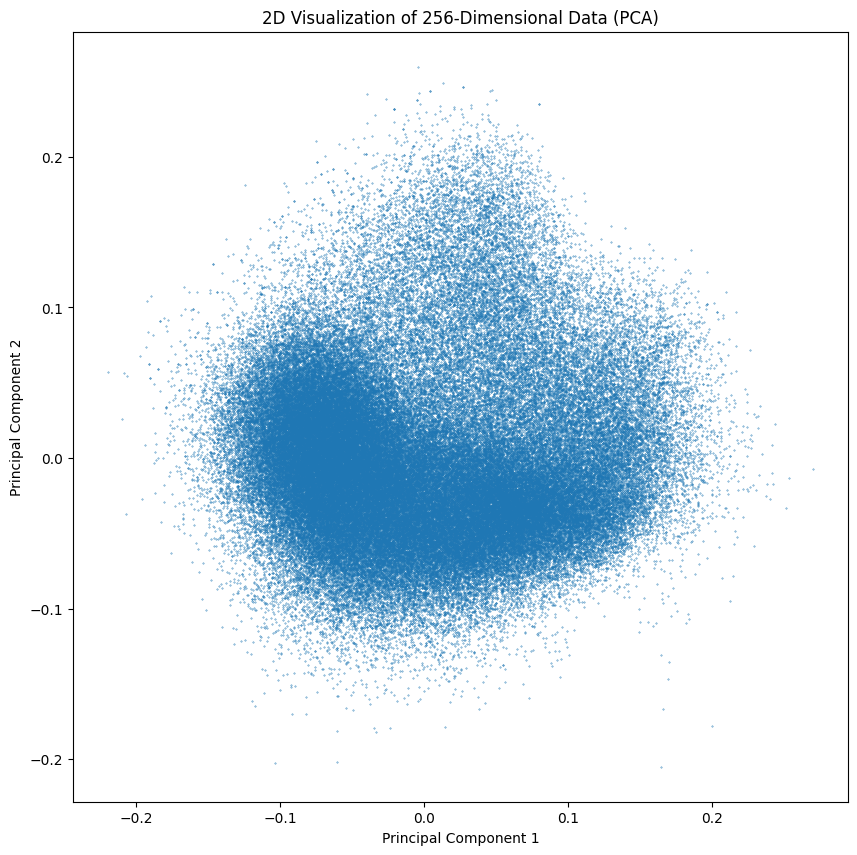

In [21]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate random 256-dimensional data (replace with your own data)
# data = np.random.rand(100, 256)
data = mem_features.cpu()
# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Create a scatter plot of the 2D data
plt.figure(figsize=(10, 10))
plt.scatter(data_2d[:, 0], data_2d[:, 1], s=0.1)
plt.title('2D Visualization of 256-Dimensional Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()